## 스타벅스 이벤트 관련 고객 설문 데이터

- 스타벅스 고객들의 이벤트 관련 설문에 응답한 데이터의 일부입니다.


- 해당 데이터에서 고객들이 이벤트에 대한 응답을 어떻게 하는지, 찾고 고객 프로모션 개선방안에 대한 인사이트를 찾습니다.

### 0. Data Description

1. Profile table

> profile 데이터는 설문에 참여한 스타벅스 회원에 관련된 정보가 담겨 있습니다.

> "Dimesional data about each person, including their age, salary, and gender. There is one unique customer for each record."


2. transcript

> 이벤트에 참여한 실제 유저들의 응답이 기록되어 있습니다.

> "Records show the different steps of promotional offers that a customer received. The different values of receiving a promotion are receiving, viewing, and completing. You also see the different transactions that a person made in the time since he became a customer. With all records, you see the day that they interacted with Starbucks and the amount that it is worth."


3. portfoilo

> 이벤트를 운영했던 내역에 관한 정보가 담겨 있습니다.

> "Information about the promotional offers that are possible to receive, and basic information about each one including the promotional type, duration of the promotion, reward, and how the promotion was distributed to customers."

### 1. 라이브러리 및 데이터 로드

- 분석에 필요한 데이터와, 라이브러리를 불러옵니다.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# 데이터 분석 필수 라이브러리 4종 세트 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Starbucks Customer Data 폴더안에 있는 데이터 3개를 불러오기
base_path = "/content/drive/MyDrive/Colab Notebooks/data/Starbucks Customer Data/"

transcript = pd.read_csv(base_path + "transcript.csv").drop(columns=["Unnamed: 0"])
profile = pd.read_csv(base_path + "profile.csv").drop("Unnamed: 0", axis=1)
portfolio = pd.read_csv(base_path + "portfolio.csv").drop(columns=["Unnamed: 0"])

In [12]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


### 2. 데이터 전처리

- 결측치가 존재하는 데이터를 찾아서, 결측치를 처리해줍니다.

In [13]:
# 각 데이터에 결측치가 있는지 확인합니다.
profile.info() # 17000 - 14825 = 2175 null-count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [21]:
# 결측치를 포함하는 데이터들은 어떤 데이터들인지 확인합니다.
nulls = profile[profile.isnull().any(axis=1)]
nulls.id.nunique()

2175

In [22]:
# 결측치를 처리해줍니다. # 평균과 같은 통계량으로 채워주거나, 버립니다.
profile = profile.dropna()
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB


### 3. profile 데이터 분석

- 설문에 참여한 사람 중, 정상적인 데이터로 판단된 데이터에 대한 분석을 수행합니다.


- 각 column마다 원하는 통계량을 찾은 뒤, 해당 통계량을 멋지게 시각화해 줄 plot을 seaborn에서 가져와 구현합니다.

In [23]:
profile

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [25]:
# profile의 became_member_on 데이터를 시간 정보로 변환해줍니다.
profile.became_member_on = pd.to_datetime(profile.became_member_on.astype(str), format='%Y%m%d')
profile

ValueError: ignored

In [26]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   id                14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 694.9+ KB


#### 성별에 관한 분석

In [28]:
profile.gender.value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

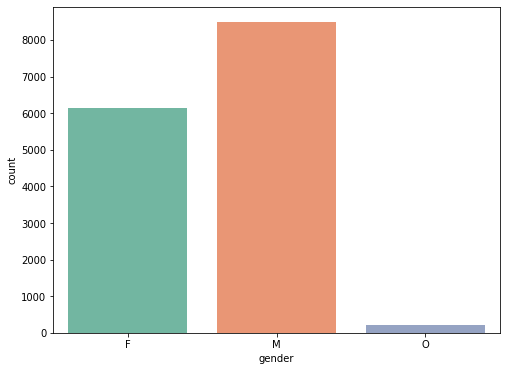

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(data=profile, x="gender", palette="Set2")
plt.show()

In [29]:
pd.pivot_table(data=profile, index="gender", values="income")

,income
gender,
F,71306.412139
M,61194.601603
O,63287.735849


#### 나이에 대한 분석

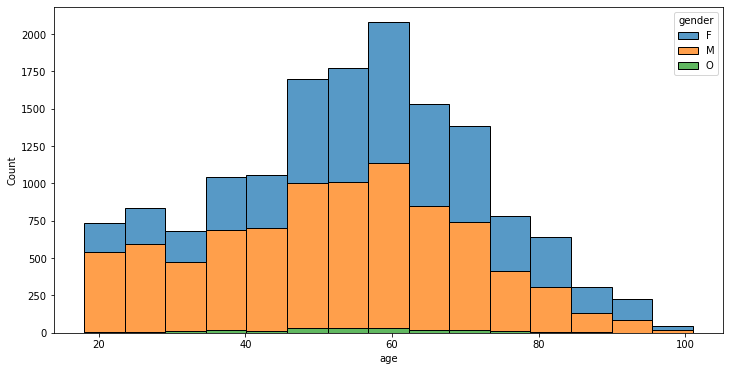

In [37]:
plt.figure(figsize=(12, 6))
#sns.countplot(data=profile, x="age")
sns.histplot(data=profile, x="age", bins=15, hue="gender", multiple="stack")
plt.show()

In [39]:
pd.pivot_table(data=profile, index="gender", values=["age", "income"])

,age,income
gender,,
F,57.544950,71306.412139
M,52.116690,61194.601603
O,54.400943,63287.735849


#### 회원이 된 날짜에 대한 분석

In [42]:
profile["join_year"] = profile.became_member_on.dt.year
profile["join_month"] = profile.became_member_on.dt.month
profile

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,age,id,became_member_on,income,join_year,join_month
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018,4
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,2018,2
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,2017,11
...,...,...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,2018,6
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,2018,7
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,2017,1
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,2016,3


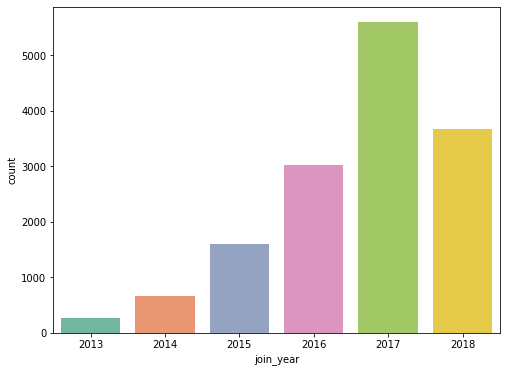

In [58]:
# join year countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=profile, x="join_year", palette="Set2")
plt.show()

In [53]:
x = profile.join_month.value_counts().index
y = profile.join_month.value_counts().values

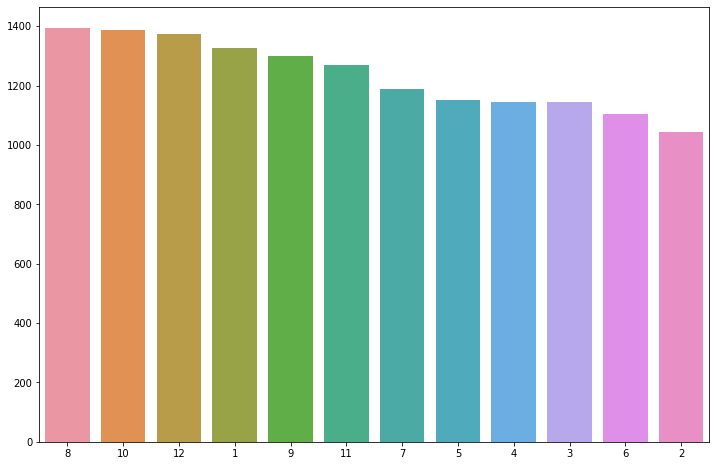

In [57]:
# join month countplot
plt.figure(figsize=(12, 8))
sns.barplot(x=x, y=y, order=x)
#sns.countplot(data=profile, y="join_month")
plt.show()

#### 수입에 대한 분석

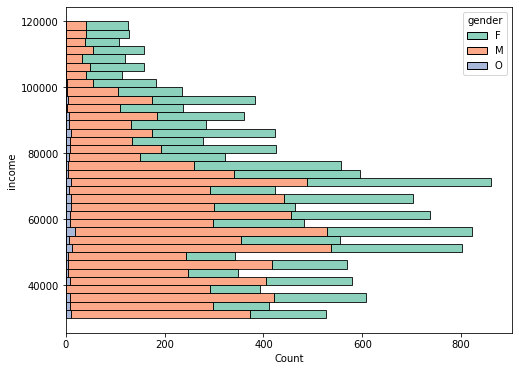

In [64]:
plt.figure(figsize=(8, 6))
sns.histplot(data=profile, y="income", palette="Set2", hue="gender", multiple="stack")
plt.show()

#### profile 데이터에 대한 상관관계 분석

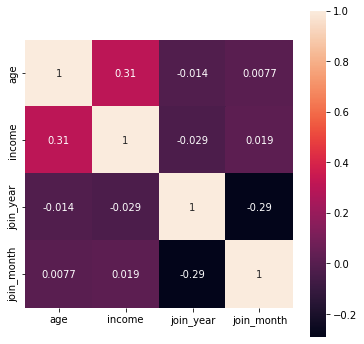

In [65]:
plt.figure(figsize=(6, 6))
sns.heatmap(data=profile.corr(), square=True, annot=True)
plt.show()

### 4. transcript에 대한 분석

- 각 column마다 원하는 통계량을 찾은 뒤, 해당 통계량을 멋지게 시각화해 줄 plot을 seaborn에서 가져와 구현합니다.


- `person`과 `values` column은 분석 대상에서 제외합니다.


> values에 대한 패턴이 궁금하다면, 아래 코드를 참고해보세요 ! (배우지 않은 내용이 있어, 어려울 수 있습니다)

In [66]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


#### event에 대한 분석

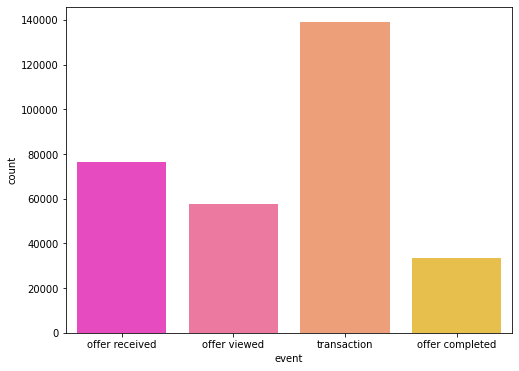

In [68]:
plt.figure(figsize=(8, 6))
sns.countplot(data=transcript, x="event", palette="spring")
plt.show()

In [69]:
pd.pivot_table(data=transcript, index="event", values="time")

,time
event,
offer completed,401.052801
offer received,332.579519
offer viewed,354.290515
transaction,381.584334


#### time에 대한 분석

In [78]:
temp = sorted(transcript.time.value_counts()[:6].index)
print(temp)
for i in range(len(temp)-1):
  print(temp[i+1] - temp[i], end=" ")

[0, 168, 336, 408, 504, 576]
168 168 72 96 72 

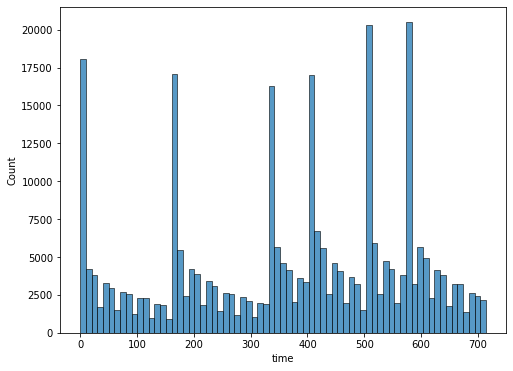

In [70]:
plt.figure(figsize=(8, 6))
sns.histplot(data=transcript, x="time")
plt.show()

In [82]:
temp_df = transcript.loc[transcript.time.isin(temp), :]
temp_df

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
262132,08eb126ad33f447ca3ad076482445c05,transaction,{'amount': 16.93},576
262133,1b4df4b48bf64727a4c445909aea1251,offer viewed,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},576
262134,ff737c250d2343729ade04c4f6eb1001,transaction,{'amount': 4.78},576
262135,400d0536e8794cbb855b0d882d67cbda,offer viewed,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},576


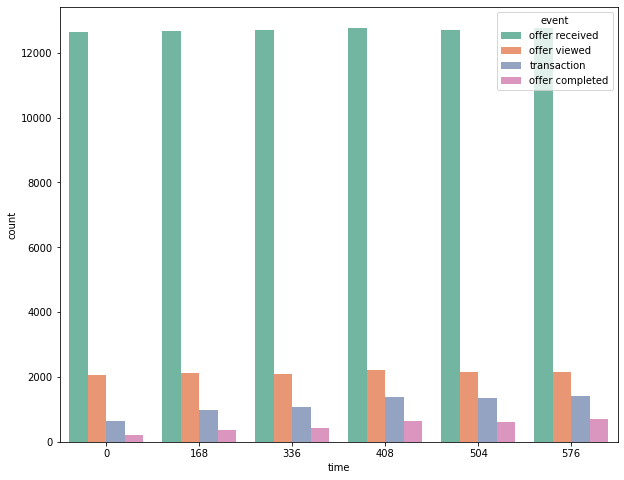

In [86]:
plt.figure(figsize=(10, 8))
#sns.countplot(data=temp_df, x="event", palette="Set2", hue="time")
sns.countplot(data=temp_df, x="time", palette="Set2", hue="event")
plt.show()

#### (Advanced, optional) value에 대한 분석 

In [ ]:
# str로 되어있는 데이터를 dictionary로 변환
transcript.value = transcript.value.apply(lambda x:eval(x))
transcript

In [ ]:
list(transcript.value[0].keys())[0]

In [ ]:
# event에 따른 value의 차이 확인
transcript["value_key"] = transcript.value.apply(lambda x:list(x.keys())[0])
transcript["value_value"] = transcript.value.apply(lambda x:list(x.values())[0])
transcript

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=transcript, x="value_key")
plt.show()

In [ ]:
transcript.value_value.value_counts()

In [ ]:
temp = transcript.loc[transcript.value_key != "amount", "value_value"]
temp_df = pd.DataFrame({"id" : temp.values})
temp_df

In [ ]:
temp.value_counts()

In [ ]:
temp_portfolio = pd.merge(temp_df, portfolio, how="left", on="id")
temp_portfolio

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=temp_portfolio, x="channels", palette="Set2")
plt.show()